In [1]:
import sys
sys.path.append("../code/")
from common import APPLIANCES_ORDER




In [2]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tensor = np.load('../1H-input.npy')

In [4]:
def create_subset_dataset(tensor):
    t_subset = tensor[:, :, 180:194, :]
    all_indices = np.array(list(range(320)))
    for i in range(1, 7):
        valid_homes = pd.DataFrame(t_subset[:, i, :].reshape(320, 14*24)).dropna().index
        all_indices = np.intersect1d(all_indices, valid_homes)
    t_subset = t_subset[all_indices, :, :, :].reshape(52, 7, 14*24)
    
    # Create artificial aggregate
    t_subset[:, 0, :] = 0.0
    for i in range(1, 7):
        t_subset[:, 0, :] = t_subset[:, 0, :] + t_subset[:, i, :]
    # t_subset is of shape (#home, appliance, days*hours)
    return t_subset, all_indices

In [5]:
t_all, valid_homes = create_subset_dataset(tensor)
t_all.shape

(52, 7, 336)

In [6]:
t_all.shape

(52, 7, 336)

In [7]:
def my_objective(y_pred, y_true):
    with tf.name_scope(None):
        return tf.losses.absolute_difference(y_pred, y_true)

In [8]:
from random import randint
from numpy import array
from numpy import argmax
from numpy import array_equal
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import TimeDistributed
from keras.layers import RepeatVector
import keras
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
n_movies = 3
n_users=3
n_latent_factors=2

Using TensorFlow backend.
/Users/nipun/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [9]:
APPLIANCES_ORDER

['aggregate', 'hvac', 'fridge', 'mw', 'dw', 'wm', 'oven']

In [10]:
train_agg = t_all[:30, 0, :].reshape(30*14, 24)
train_hvac = t_all[:30, 1, :].reshape(30*14, 24)
train_fridge = t_all[:30, 2, :].reshape(30*14, 24)
train_mw = t_all[:30, 3, :].reshape(30*14, 24)





test_hvac = t_all[30:, 1, :].reshape(22*14, 24)
test_fridge = t_all[30:, 2, :].reshape(22*14, 24)

test_mw = t_all[30:, 3, :].reshape(22*14, 24)



test_agg = t_all[30:, 0, :].reshape(22*14, 24)

In [11]:
train_hvac.shape

(420, 24)

In [12]:
train_hvac_fridge = np.hstack([train_hvac, train_fridge])
test_hvac_fridge = np.hstack([test_hvac, test_fridge])

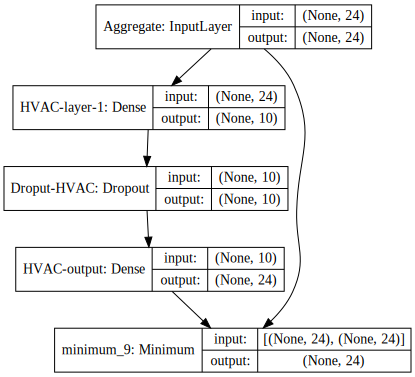

In [243]:
np.random.seed(0)
from keras.layers.merge import Subtract, Minimum
agg_input = keras.layers.Input(shape=[24],name='Aggregate')
hvac_dense_1 = keras.layers.Dense(units=10,name='HVAC-layer-1',activation='relu')(agg_input)
dropout = keras.layers.Dropout(rate=0.3,name='Droput-HVAC')(hvac_dense_1)


out = keras.layers.Dense(units=24,name='HVAC-output',activation='relu')(dropout)
out = Minimum()([out, agg_input])


model = keras.Model(agg_input, out)


SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [244]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Aggregate (InputLayer)          (None, 24)           0                                            
__________________________________________________________________________________________________
HVAC-layer-1 (Dense)            (None, 10)           250         Aggregate[0][0]                  
__________________________________________________________________________________________________
Droput-HVAC (Dropout)           (None, 10)           0           HVAC-layer-1[0][0]               
__________________________________________________________________________________________________
HVAC-output (Dense)             (None, 24)           264         Droput-HVAC[0][0]                
__________________________________________________________________________________________________
minimum_9 

In [245]:
model.compile('adam','mean_absolute_error')
model.fit(train_agg, train_hvac, epochs=300, validation_split=0.2)

Train on 336 samples, validate on 84 samples
Epoch 1/300
336/336 [==============================] - 1s 3ms/step - loss: 692.6790 - val_loss: 702.7856
Epoch 2/300
336/336 [==============================] - 0s 62us/step - loss: 653.0743 - val_loss: 664.2887
Epoch 3/300
336/336 [==============================] - 0s 55us/step - loss: 617.9533 - val_loss: 624.9523
Epoch 4/300
336/336 [==============================] - 0s 55us/step - loss: 572.8267 - val_loss: 582.4222
Epoch 5/300
336/336 [==============================] - 0s 57us/step - loss: 530.8641 - val_loss: 532.7503
Epoch 6/300
336/336 [==============================] - 0s 58us/step - loss: 503.9723 - val_loss: 475.7102
Epoch 7/300
336/336 [==============================] - 0s 56us/step - loss: 455.5215 - val_loss: 411.7104
Epoch 8/300
336/336 [==============================] - 0s 56us/step - loss: 416.7683 - val_loss: 353.6269
Epoch 9/300
336/336 [==============================] - 0s 56us/step - loss: 371.1581 - val_loss: 315.4803
Ep

336/336 [==============================] - 0s 66us/step - loss: 128.5321 - val_loss: 133.7658
Epoch 153/300
336/336 [==============================] - 0s 79us/step - loss: 129.4547 - val_loss: 133.7658
Epoch 154/300
336/336 [==============================] - 0s 59us/step - loss: 128.0349 - val_loss: 133.7658
Epoch 155/300
336/336 [==============================] - 0s 61us/step - loss: 128.1979 - val_loss: 133.7658
Epoch 156/300
336/336 [==============================] - 0s 66us/step - loss: 128.0771 - val_loss: 133.7658
Epoch 157/300
336/336 [==============================] - 0s 57us/step - loss: 127.8169 - val_loss: 133.7658
Epoch 158/300
336/336 [==============================] - 0s 74us/step - loss: 127.6376 - val_loss: 133.7658
Epoch 159/300
336/336 [==============================] - 0s 60us/step - loss: 127.8972 - val_loss: 133.7658
Epoch 160/300
336/336 [==============================] - 0s 58us/step - loss: 128.6477 - val_loss: 133.7658
Epoch 161/300
336/336 [===================

In [246]:
test_hvac[0, :]

array([  284.06668091,   260.91665649,   280.2166748 ,   287.58334351,
         378.4833374 ,  1008.7166748 ,    23.43333244,   429.66665649,
         460.81668091,   585.70001221,   349.2333374 ,   770.61663818,
         563.9666748 ,   694.04998779,  1034.51672363,  1055.44995117,
         657.29998779,  1054.2833252 ,   453.5       ,   492.45001221,
         521.66668701,   243.7666626 ,   235.9833374 ,     0.        ])

In [247]:
pred_hvac.shape

(308, 24)

In [251]:
pred_hvac = model.predict(test_agg)


from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(pred_hvac, test_hvac))
print(mean_absolute_error(pred_hvac, test_agg))




135.12725879
2.32021058244e-05


In [249]:
(pd.DataFrame(pred_hvac) - pd.DataFrame(test_agg)).max()

0     0.000061
1     0.000060
2     0.000058
3     0.000058
4     0.000079
5     0.000116
6     0.000062
7     0.000059
8     0.000082
9     0.000054
10    0.000099
11    0.000114
12    0.000116
13    0.000116
14    0.000242
15    0.000233
16    0.000221
17    0.000226
18    0.000233
19    0.000233
20    0.000221
21    0.000099
22    0.000114
23    0.000115
dtype: float64

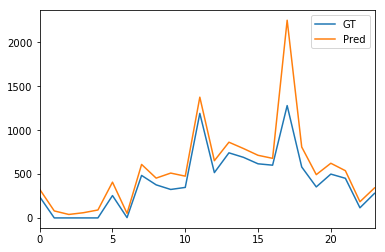

In [228]:
pd.Series(test_hvac[1, :]).plot(label='GT')
#pd.Series(test_agg[1, :]).plot(label='GT')


pd.Series(model.predict(test_agg[1:2])[0, :24]).plot(label='Pred')




plt.legend()